In [383]:
import numpy as np
import scipy.io as sio
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [3]:
mat_contents = sio.loadmat("mnist_digits.mat") # mat_contents['X'].shape = (10000, 784)

In [79]:
# select any sample from the 10,000 dataset
n = 279
# to see the Y value
print(mat_contents['Y'][n][0])
# to see the X value as image
Image.fromarray(mat_contents['X'][n].reshape(28,28),'L') 

6


In [69]:
dataset = np.concatenate((mat_contents['X'], mat_contents['Y']), axis=1) # X, Y = dataset[:,:-1], Y dataset[:,-1] 

In [216]:
test_data.shape

(2993, 785)

In [412]:
class Percepton:

    def __init__(self, dataset, ratio=0.8, max_iter=10, digit=0):
        self.ratio = ratio
        self.max_iter = max_iter
        self.digit = digit
        self.dataset = dataset
        msk = np.random.rand(len(dataset)) < ratio
        self.train_data = dataset[msk]
        self.test_data = dataset[~msk]
        
        self.w = np.zeros((len(train_data[0]), 1))
        self.weights = [w]
        self.c = np.zeros(len(train_data))
        self.k = 1
       
    def clean(self, ratio=0.8):
        msk = np.random.rand(len(dataset)) < ratio
        self.train_data = self.dataset[msk]
        self.test_data = self.dataset[~msk]
        self.w = np.zeros((len(train_data[0]), 1))
        self.weights = [w]
        self.c = np.zeros(len(train_data))
        self.k = 1
        return
    
    def build_v0(self, digit):
        
        train_data = self.train_data
        max_iter = self.max_iter
        w = self.w
        
        for i in range(max_iter):

            datapoint = train_data[i%(len(train_data)+1)]
            y = 1 if (datapoint[-1] == digit) else -1
            x = datapoint[:-1]

            if y*x.dot(w[1:])[0] + w[0][0] <= 0:

                w[1:] = w[1:] + y*x.reshape(784,1)
                w[0] = w[0] + y

        return w
    
    def build_v1(self, digit):
        
        train_data = self.train_data
        max_iter = self.max_iter
        w = self.w
        
        for i in range(max_iter):
        
            datapoint_min = train_data[0]
            y_min = 1 if (datapoint_min[-1] == digit) else -1
            x_min = datapoint_min[:-1]
            a_min = y_min*x_min.dot(w[1:])[0] + w[0][0]

            for datapoint in train_data:

                y = 1 if (datapoint[-1] == digit) else -1
                x = datapoint[:-1]
                a = y*x.dot(w[1:])[0] + w[0][0]

                if a < a_min:
                    datapoint_min = datapoint
                    y_min = y
                    x_min = x
                    a_min = a

            if a_min <= 0:
                w[1:] = w[1:] + y_min * x_min.reshape(784,1)
                w[0] = w[0] + y_min

        return w

    def build_v2(self, digit):
        
        train_data = self.train_data
        max_iter = self.max_iter
        w = self.w
        w_list = self.weights
        c = self.c
        k = self.k

        for i in range(max_iter):

            datapoint = train_data[i%(len(train_data)+1)]
            y = 1 if (datapoint[-1] == digit) else -1
            x = datapoint[:-1]

            if y*x.dot(w[1:])[0] + w[0][0] <= 0:

                w[1:] = w[1:] + y*x.reshape(784,1)
                w[0] = w[0] + y
                c[k+1] = 1
                k += 1
                w_list.append(w)

            else:

                c[k] += 1

        return w_list, c, k
    
    @staticmethod
    def test(test_datapoint, w):
        return np.sign(test_datapoint[:-1].dot(w[1:])[0] + w[0][0])
    
    @staticmethod
    def test_v2(test_datapoint, w_list, c, k):
        res = 0
        for i in range(k):
            w = w_list[i]
            res += c[i] * np.sign(test_datapoint[:-1].dot(w[1:])[0] + w[0][0])
        return np.sign(res)

    def accuracy_v0(self, digit):
    
        count = 0
        total = len(test_data)
        self.build_v0(digit)

        for datapoint in self.test_data:

            if (Percepton.test(datapoint, self.w) == 1 and datapoint[-1]==digit) \
            or (Percepton.test(datapoint, self.w) == -1 and datapoint[-1]!=digit):
                count += 1

        return count/total
    
    def accuracy_v1(self, digit):
    
        count = 0
        total = len(test_data)
        self.build_v1(digit)

        for datapoint in self.test_data:

            if (Percepton.test(datapoint, self.w) == 1 and datapoint[-1]==digit) \
            or (Percepton.test(datapoint, self.w) == -1 and datapoint[-1]!=digit):
                count += 1

        return count/total
    
    def accuracy_v2(self, digit):

        count = 0
        total = len(test_data)
        self.build_v2(digit)

        for datapoint in self.test_data:

            if (Percepton.test_v2(datapoint, self.weights, self.c, self.k) == 1 and datapoint[-1]==digit) \
            or (Percepton.test_v2(datapoint, self.weights, self.c, self.k) == -1 and datapoint[-1]!=digit):
                count += 1

        return count/total

In [413]:
p = Percepton(dataset, 0.8, 10, 0)
p.accuracy_v2(0)

(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3])

(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3])

(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3])

(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3])

(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3]),)
(array([2, 3])

0.0

In [405]:
RATIO = 0.8
ITER = 10

for num in range(10):
    p = Percepton(dataset, RATIO, ITER, num)
    print('For digit {}, the accuracy of V0 is {}.'\
          .format(num, p.accuracy_v0(num)))
    print('For digit {}, the accuracy of V1 is {}.'\
          .format(num, p.accuracy_v1(num)))
    print('For digit {}, the accuracy of V2 is {}.'\
          .format(num, p.accuracy_v2(num)))

For digit 0, the accuracy of V0 is 0.5940527898429669.
For digit 0, the accuracy of V1 is 0.6007350484463748.
For digit 0, the accuracy of V2 is 0.0.
For digit 1, the accuracy of V0 is 0.5703307718008687.
For digit 1, the accuracy of V1 is 0.28600066822586034.
For digit 1, the accuracy of V2 is 0.0.
For digit 2, the accuracy of V0 is 0.5933845639826262.
For digit 2, the accuracy of V1 is 0.5933845639826262.
For digit 2, the accuracy of V2 is 0.0.
For digit 3, the accuracy of V0 is 0.5950551286334781.
For digit 3, the accuracy of V1 is 0.5977280320748413.
For digit 3, the accuracy of V2 is 0.0.
For digit 4, the accuracy of V0 is 0.561309722686268.
For digit 4, the accuracy of V1 is 0.5813564984964918.
For digit 4, the accuracy of V2 is 0.0.
For digit 5, the accuracy of V0 is 0.6070831941196124.
For digit 5, the accuracy of V1 is 0.6070831941196124.
For digit 5, the accuracy of V2 is 0.0.
For digit 6, the accuracy of V0 is 0.5903775476110925.
For digit 6, the accuracy of V1 is 0.62646174

Text(0.5, 1.0, 'Performance under Different Splits')

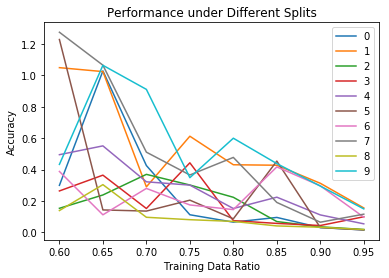

In [400]:
# Plot accuracy against ratio
# model: v0

ITER = 10
x_data = np.arange(0.6, 1.0, 0.05)

for digit in range(10):
    y_data = []
    for ratio in x_data:
        p = Percepton(dataset, ratio, ITER, digit)
        y_data.append(p.accuracy_v1(digit))
    plt.plot(x_data, y_data, label = str(digit))

plt.legend()
plt.xlabel('Training Data Ratio')
plt.ylabel('Accuracy')
plt.title('Performance under Different Splits')


FileNotFoundError: [Errno 2] No such file or directory: 'fig/splits_v0_smoothed.png'

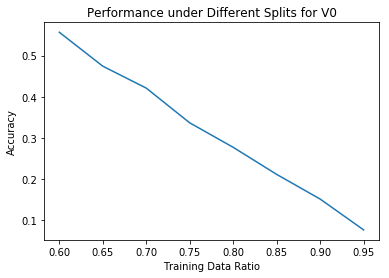

In [402]:
# Plot accuracy against ratio, 
# model: v0
# avarage of N runs

N = 5
ITER = 10
x_data = np.arange(0.6, 1.0, 0.05)
y_data = []

for n in range(N):
    y_ = []
    for ratio in x_data:
        a = []
        for digit in range(10):
            p = Percepton(dataset, ratio, ITER, digit)
            a.append(p.accuracy_v1(digit))
        y_.append(np.mean(a))
    
    y_data.append(y_)
    
y_data = np.mean(y_data, axis=0)

plt.plot(x_data, y_data)
plt.xlabel('Training Data Ratio')
plt.ylabel('Accuracy')
plt.title('Performance under Different Splits for V0')
plt.savefig('fig/splits_v0_smoothed.png')

For digit 0, the accuracy of V0 is 0.9321750751754093.
For digit 1, the accuracy of V0 is 0.9595723354493819.
For digit 2, the accuracy of V0 is 0.9335115268960908.
For digit 3, the accuracy of V0 is 0.8980955562980287.
For digit 4, the accuracy of V0 is 0.9261610424323421.
For digit 5, the accuracy of V0 is 0.9051119278316071.
For digit 6, the accuracy of V0 is 0.954560641496826.
For digit 7, the accuracy of V0 is 0.9385232208486468.
For digit 8, the accuracy of V0 is 0.8813899097895088.
For digit 9, the accuracy of V0 is 0.6779151353157368.


In [351]:
for num in range(10):
    print('For digit {}, the accuracy of V1 is {}.'\
          .format(num, percepton_accuracy(train_data, test_data, 100, num, mode=1)))

For digit 0, the accuracy of V1 is 0.2368860674908119.
For digit 1, the accuracy of V1 is 0.9204811226194454.
For digit 2, the accuracy of V1 is 0.4026060808553291.
For digit 3, the accuracy of V1 is 0.89074507183428.
For digit 4, the accuracy of V1 is 0.9034413631807551.
For digit 5, the accuracy of V1 is 0.2990310725025058.
For digit 6, the accuracy of V1 is 0.7895088539926495.
For digit 7, the accuracy of V1 is 0.9365185432676244.
For digit 8, the accuracy of V1 is 0.8022051453391246.
For digit 9, the accuracy of V1 is 0.18743735382559304.
